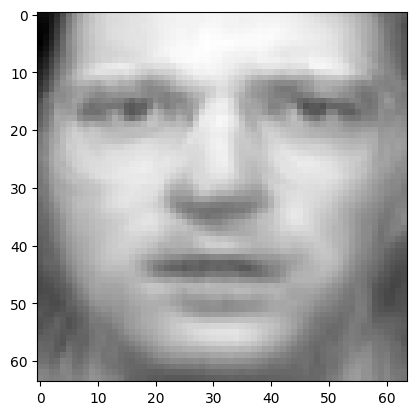

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# Olivettiデータセットの顔画像データをロード
faces, _ = datasets.fetch_olivetti_faces(return_X_y=True)

# 顔画像の平均を計算し、データから平均を引いて標準化する
mean = np.mean(faces, axis=0)
faces = faces - mean

# 共分散行列を計算
Cov = np.dot(faces, faces.T) / 400

# 共分散行列の固有値と固有ベクトルを計算
eigval, eigvec_v = np.linalg.eig(Cov)

# 主成分ベクトルを計算
eigvec_u = np.dot(faces.T, eigvec_v)

# 主成分ベクトルを正規化
for i in range(400):
   eigvec_u[:, i] /= np.linalg.norm(eigvec_u[:, i])

# 特定の顔画像を主成分ベクトルに変換
a = np.dot(faces[375], eigvec_u[:, :30])

# 再構築された顔画像を計算
revface = np.dot(a, eigvec_u[:, :30].T)

# 平均顔を再加算し、元のスケールに戻す
revface = revface + mean

# 再構築された顔画像を表示
plt.imshow(revface.reshape([64, 64]), cmap="gray")
plt.show()


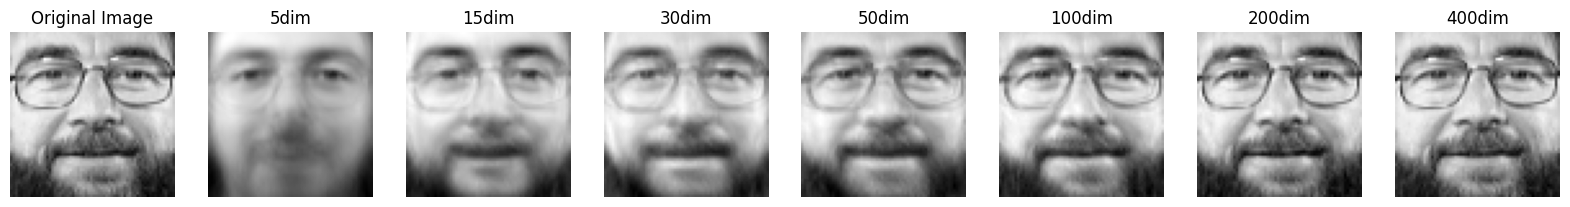

In [5]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Olivetti Facesデータセットを読み込む
faces, _ = datasets.fetch_olivetti_faces(return_X_y=True)

# 各顔画像から平均を引く
mean = np.mean(faces, axis=0)
faces = faces - mean

# 共分散行列を計算する
Cov = np.dot(faces, faces.T) / 400

# 共分散行列の固有値分解を行う
eigval, eigvec_v = np.linalg.eig(Cov)

# 元のデータ行列の固有ベクトルを計算する
eigvec_u = np.dot(faces.T, eigvec_v)

# 固有ベクトルを正規化する
for i in range(400):
    eigvec_u[:, i] /= np.linalg.norm(eigvec_u[:, i])

# 復元する対象の顔画像のインデックス（ここではランダムに選ぶ）
target_index = np.random.randint(0, faces.shape[0])
target_face = faces[target_index]

# 次元削減と再構築を行う
reconstructed_faces = []
num_dimensions = [5, 15, 30, 50, 100, 200, 400]
for dim in num_dimensions:
    a = np.dot(target_face, eigvec_u[:, :dim])
    reconstructed_face = np.dot(a, eigvec_u[:, :dim].T)
    reconstructed_face = reconstructed_face + mean
    reconstructed_faces.append(reconstructed_face)

# オリジナルの顔画像を表示する
original_face = faces[target_index] + mean

# 復元された画像を表示する
fig, axs = plt.subplots(1, len(num_dimensions) + 1, figsize=(20, 5))

# オリジナルの顔画像を描画
axs[0].imshow(original_face.reshape(64, 64), cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# 次元削減された画像を描画
for i, dim in enumerate(num_dimensions):
    axs[i+1].imshow(reconstructed_faces[i].reshape(64, 64), cmap='gray')
    axs[i+1].set_title(f'{dim}dim')
    axs[i+1].axis('off')

plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


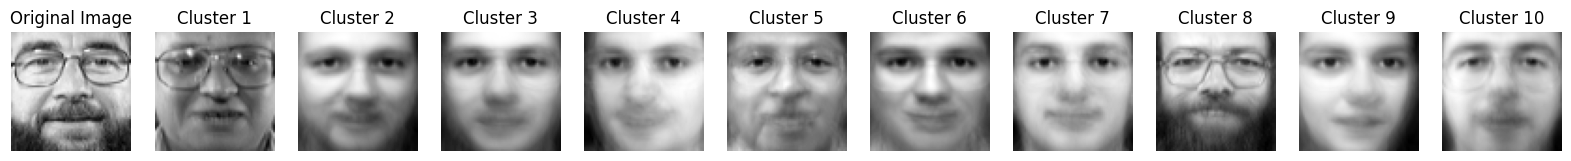

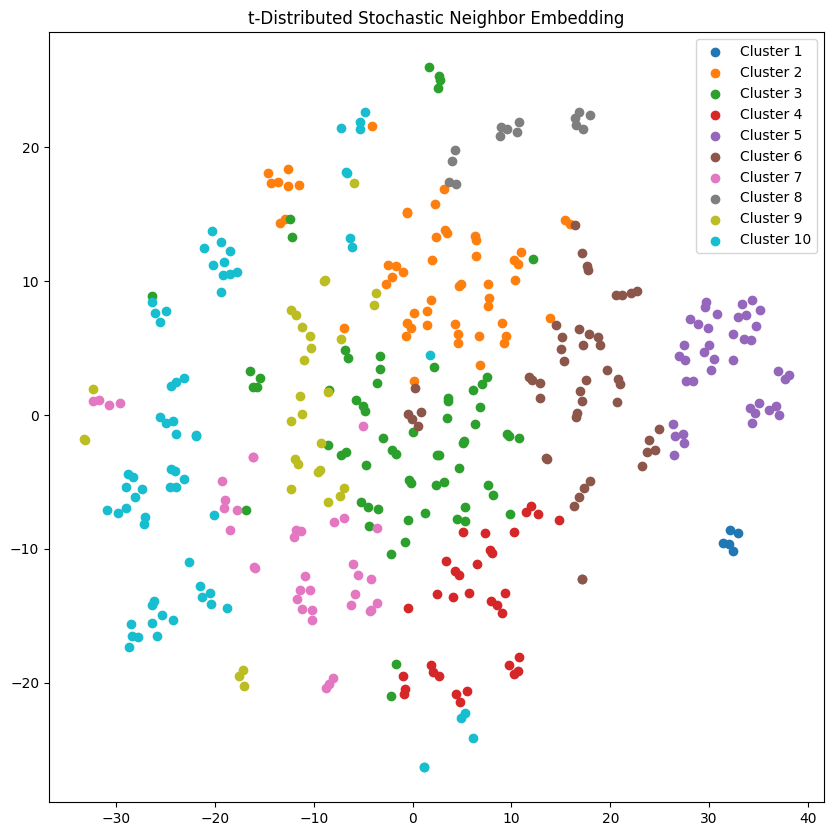

In [18]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# k-means
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(faces)
labels = kmeans.labels_
fig, axs = plt.subplots(1, num_clusters + 1, figsize=(20, 5))
axs[0].imshow(original_face.reshape(64, 64), cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# k-meansによるクラスタリング結果
for i in range(num_clusters):
    cluster_faces = faces[labels == i]
    cluster_mean = np.mean(cluster_faces, axis=0) + mean
    axs[i+1].imshow(cluster_mean.reshape(64, 64), cmap='gray')
    axs[i+1].set_title(f'Cluster {i+1}')
    axs[i+1].axis('off')
plt.show()

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
faces_2d = tsne.fit_transform(faces)

# クラスタごとにグループ分けしてグラフにプロット
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(num_clusters):
    cluster_faces = faces_2d[labels == i]
    ax.scatter(cluster_faces[:, 0], cluster_faces[:, 1], label=f'Cluster {i+1}')

ax.set_title('t-Distributed Stochastic Neighbor Embedding')
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


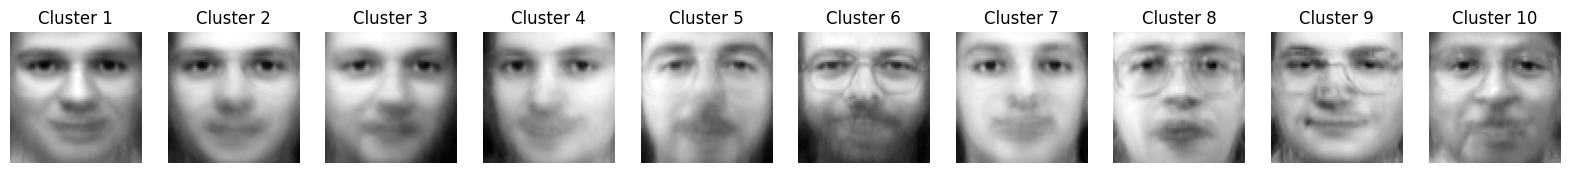

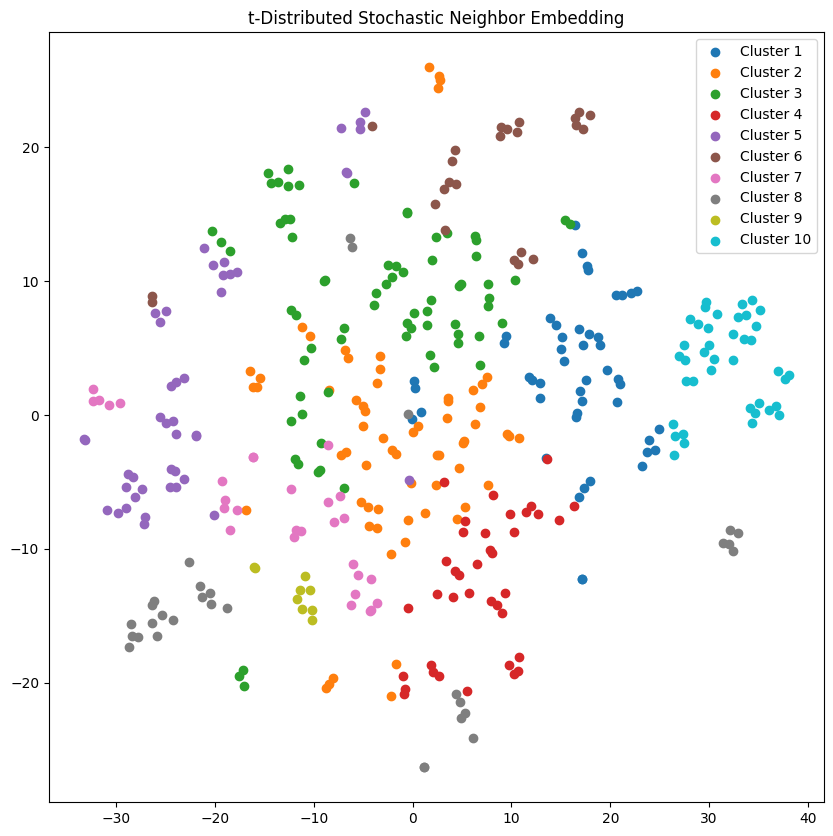

In [19]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# k-means
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(faces)
labels = kmeans.labels_

# k-meansによるクラスタリング結果
fig, axs = plt.subplots(1, num_clusters, figsize=(20, 5))

for i in range(num_clusters):
    cluster_faces = faces[labels == i]
    cluster_mean = np.mean(cluster_faces, axis=0) + mean
    axs[i].imshow(cluster_mean.reshape(64, 64), cmap='gray')
    axs[i].set_title(f'Cluster {i+1}')
    axs[i].axis('off')
    
plt.show()

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
faces_2d = tsne.fit_transform(faces)

# クラスタごとにグループ分けしてグラフにプロット
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(num_clusters):
    cluster_faces = faces_2d[labels == i]
    ax.scatter(cluster_faces[:, 0], cluster_faces[:, 1], label=f'Cluster {i+1}')

ax.set_title('t-Distributed Stochastic Neighbor Embedding')
ax.legend()
plt.show()
